In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msgno
import seaborn as sns
from scipy.stats import zscore as zs
import os
import pickle

%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
# File to Load
train_data_to_load = "ml_case_training_data.csv"
hist_data_to_load = "ml_case_training_hist_data.csv"
churn_data_to_load = "ml_case_training_output.csv"

In [3]:
# Read the Data
train_data_df = pd.read_csv(train_data_to_load)
hist_data_df = pd.read_csv(hist_data_to_load)
churn_data_df = pd.read_csv(churn_data_to_load)

In [4]:
train_data_df.head(3).append(train_data_df.tail(3))

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392


In [5]:
hist_data_df.head(3).append(hist_data_df.tail(3))

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [6]:
churn_data_df.head(3).append(churn_data_df.tail(3))

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0
16095,563dde550fd624d7352f3de77c0cdfcd,0


#### Merge the train data and churn data

In [7]:
train = train_data_df.merge(right=churn_data_df, on=['id'])

In [8]:
train.head(3).append(train.tail(3))

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [9]:
train.dtypes.sort_values(axis = 0, ascending = True)

churn                         int64
num_years_antig               int64
nb_prod_act                   int64
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
forecast_cons_year            int64
net_margin                  float64
margin_net_pow_ele          float64
margin_gross_pow_ele        float64
imp_cons                    float64
forecast_price_pow_p1       float64
forecast_price_energy_p2    float64
forecast_price_energy_p1    float64
forecast_meter_rent_12m     float64
forecast_discount_energy    float64
forecast_cons_12m           float64
forecast_cons               float64
forecast_bill_12m           float64
forecast_base_bill_year     float64
forecast_base_bill_ele      float64
campaign_disc_ele           float64
pow_max                     float64
date_renewal                 object
date_modif_prod              object
has_gas                      object
date_first_activ             object
date_end                    

In [10]:
train.shape

(16096, 33)

In [11]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [12]:
train['campaign_disc_ele'].isnull().values.all()

True

In [13]:
# churn count
churn_count = train['churn'].value_counts()
churn_count

0    14501
1     1595
Name: churn, dtype: int64

In [14]:
# Churn rate
churn_rate = train['churn'].value_counts() / train.shape[0] * 100
churn_rate

0    90.090706
1     9.909294
Name: churn, dtype: float64

In [15]:
hist_data_df.head(3).append(hist_data_df.tail(3))

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [16]:
hist_data_df.dtypes.sort_values(axis = 0, ascending = True)

price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
id               object
price_date       object
dtype: object

In [17]:
hist_data_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [18]:
# churn count
churn_count = churn_data_df['churn'].value_counts()
churn_count

0    14501
1     1595
Name: churn, dtype: int64

#### Observations
1. The campaign_disc_ele is an empty column.
2. we notice a downward trend in average price of energy and average price of power from the first to the third period
3. 14 columns in the train data contain negative values
4. All 3 power price columns contain negative values

#### Average energy price per period
1. average price of energy for the 1st period was 0.140991
2. average price of energy for the 2nd period was 0.054412
3. average price of energy for the 3rd period was 0.030712

#### Average power price per period
1. average price of power for the 1st period was 43.325546
2. average price of power for the 2nd period was 10.698201
3. average price of power for the 3rd period was 6.455436

#### Churn: January to March 2016
1. 1595 customers churned in three months between January and March 2016
2. There were 14501 active customers
3. Customer retention is 90.09%
4. Customer attrition is 9.91%
5. The churn data has no missing values

#### Missing Data: train

In [19]:
pd.DataFrame({"Missing values (%)":train.isnull().sum()/len(train.index)*100}).sort_values(by = 'Missing values (%)', ascending = False)

,Missing values (%)
campaign_disc_ele,100.000000
forecast_base_bill_ele,78.205765
date_first_activ,78.205765
forecast_cons,78.205765
forecast_bill_12m,78.205765
forecast_base_bill_year,78.205765
activity_new,59.300447
channel_sales,26.205268
date_modif_prod,0.975398
forecast_discount_energy,0.782803


#### Missing Data: historical price

In [20]:
pd.DataFrame({"Missing values (%)":hist_data_df.isnull().sum()/len(hist_data_df.index)*100}).sort_values(by = 'Missing values (%)', ascending = False)

,Missing values (%)
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138
id,0.000000
price_date,0.000000


#### Observations: Missing Data
1. The campaign_disc_ele column is completely missing
2. The date_first_activ, forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, and forecast_cons columns have 78.206% of their data missing
3. The activity_new, and channel_sales columns have 59.30% and 26.21% of their data missing respectively
4. All other columns have less than 1% or no missing data

#### Visualization: Churn Proportion

Retained: 14501
Churned: 1595
Proportion of Churned Customers: 0.09909294234592446


<AxesSubplot:ylabel=' '>

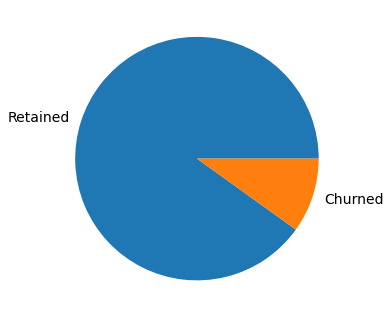

In [21]:
print("Retained: " + str(len(train[train["churn"] == 0])))
print("Churned: " + str(len(train[train["churn"] == 1])))
print("Proportion of Churned Customers: " + str(len(train[train["churn"] == 1])/ train.shape[0]))

# Determine the number of churned customers
churn_proportion = train.copy()
churn_proportion[" "] = np.where(churn_proportion["churn"] == 1 ,  "Churned", "Retained")

%matplotlib inline
# plot chart
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect='equal')
churn_proportion[" "].value_counts().plot(kind='pie',  ax=ax1, startangle=0, legend = False, fontsize=14)

#### Visualization: Company Activity by Churn

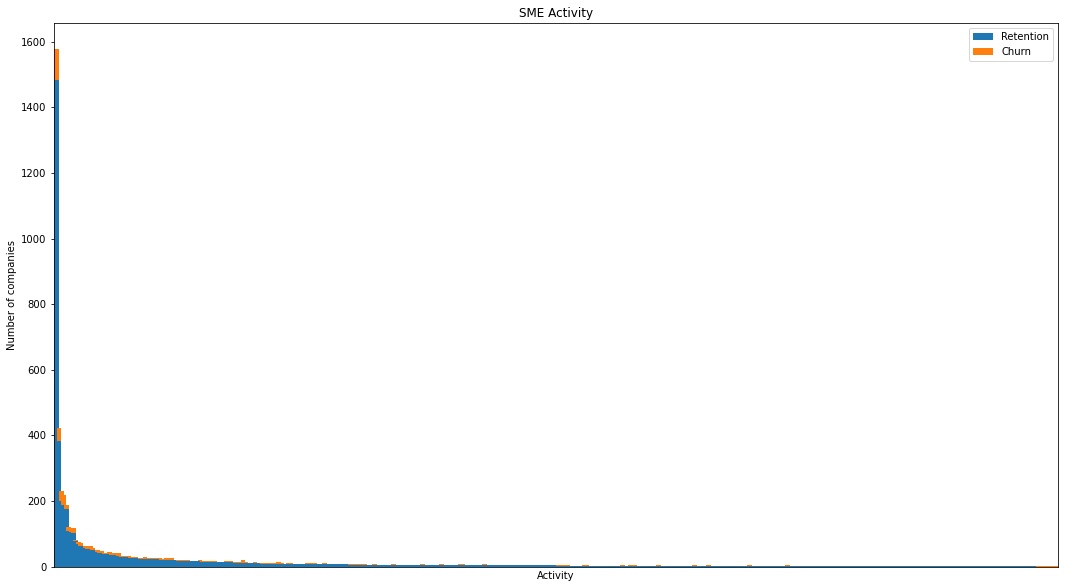

In [22]:
activity = train[["id", "activity_new", "churn"]]
activity = activity.groupby([activity["activity_new"], activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending= False)
activity.plot(kind="bar", figsize = (18, 10),width = 2, stacked = True, title = "SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc = "upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

In [23]:
activity_total = activity.fillna(0)[0] + activity.fillna(0)[1]
activity_percentage = activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percentage churn": activity_percentage, "Total companies": activity_total}).sort_values(by = "Percentage churn", ascending = False ).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


#### Churn By Sales Channel

In [24]:
channel = train[["id","channel_sales", "churn"]]
channel = channel.groupby([channel["channel_sales"], channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [25]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_total

channel_sales
epumfxlbckeskwekxbiuasklxalciiuu       4.0
ewpakwlliwisiwduibdlfmalxowmwpci     966.0
fixdbufsefwooaasfcxdxadsiekoceaa       2.0
foosdfpfkusacimwkcsosbicdxkicaua    7377.0
lmkebamcaaclubfxadlmueccxoimlema    2073.0
sddiedcslfslkckwlfkdpoeeailfpeds      12.0
usilxuppasemubllopkaafesmlibmsdf    1444.0
dtype: float64

In [26]:
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
channel_percentage

channel_sales
epumfxlbckeskwekxbiuasklxalciiuu     0.000000
ewpakwlliwisiwduibdlfmalxowmwpci     8.488613
fixdbufsefwooaasfcxdxadsiekoceaa     0.000000
foosdfpfkusacimwkcsosbicdxkicaua    12.498306
lmkebamcaaclubfxadlmueccxoimlema     5.595755
sddiedcslfslkckwlfkdpoeeailfpeds     0.000000
usilxuppasemubllopkaafesmlibmsdf    10.387812
dtype: float64

In [27]:
result = pd.DataFrame({"Churn Percentage": channel_percentage, "Total Companies": channel_total}).sort_values(by = "Churn Percentage", ascending=False)
result

,Churn Percentage,Total Companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


#### Data Cleaning: Missing Data

In [28]:
view_missing = pd.DataFrame({"Missing values (%)":train.isnull().sum()/len(train.index)*100}).sort_values(by = 'Missing values (%)', ascending = False)

In [29]:
view_missing_col = view_missing.loc[view_missing['Missing values (%)'] >= 60]
view_missing_col.index

Index(['campaign_disc_ele', 'forecast_base_bill_ele', 'date_first_activ',
       'forecast_cons', 'forecast_bill_12m', 'forecast_base_bill_year'],
      dtype='object')

In [30]:
train.drop(columns= view_missing_col.index, inplace=True)

In [31]:
pd.DataFrame({"Dataframe Columns": train.columns})

,Dataframe Columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


In [32]:
# for for duplicate rows
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


#### Formatting Data: Missing Dates

In [33]:
view_missing_dates = view_missing.loc[(view_missing.index.str.contains("date")) & (view_missing["Missing values (%)"]<60) & (view_missing["Missing values (%)"]!=0)]
view_missing_dates

,Missing values (%)
date_modif_prod,0.975398
date_renewal,0.248509
date_end,0.012425


In [34]:
# replace the missing values with date values with the most occurence
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0] 
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]


In [35]:
view_missing = pd.DataFrame({"Missing values (%)":train.isnull().sum()/len(train.index)*100}).sort_values(by = 'Missing values (%)', ascending = False)
view_missing_dates = view_missing.loc[(view_missing.index.str.contains("date")) & (view_missing["Missing values (%)"]<60) & (view_missing["Missing values (%)"]!=0)]
view_missing_dates

,Missing values (%)


#### Formatting Data: Missing Prices (hist_data_df)

In [36]:
view_missing_prices = pd.DataFrame({"Missing values (%)":hist_data_df.isnull().sum()/len(hist_data_df.index)*100}).sort_values(by = 'Missing values (%)', ascending = False)
view_missing_prices

,Missing values (%)
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138
id,0.000000
price_date,0.000000


In [37]:
# fill missing data with median of each column
hist_data_df.loc[hist_data_df["price_p1_var"].isnull(),"price_p1_var"] = hist_data_df["price_p1_var"].median() 
hist_data_df.loc[hist_data_df["price_p2_var"].isnull(),"price_p2_var"] = hist_data_df["price_p2_var"].median() 
hist_data_df.loc[hist_data_df["price_p3_var"].isnull(),"price_p3_var"] = hist_data_df["price_p3_var"].median() 
hist_data_df.loc[hist_data_df["price_p1_fix"].isnull(),"price_p1_fix"] = hist_data_df["price_p1_fix"].median() 
hist_data_df.loc[hist_data_df["price_p2_fix"].isnull(),"price_p2_fix"] = hist_data_df["price_p2_fix"].median() 
hist_data_df.loc[hist_data_df["price_p3_fix"].isnull(),"price_p3_fix"] = hist_data_df["price_p3_fix"].median()

In [38]:
view_missing_prices = pd.DataFrame({"Missing values (%)":hist_data_df.isnull().sum()/len(hist_data_df.index)*100}).sort_values(by = 'Missing values (%)', ascending = False)
view_missing_prices

,Missing values (%)
id,0.0
price_date,0.0
price_p1_var,0.0
price_p2_var,0.0
price_p3_var,0.0
price_p1_fix,0.0
price_p2_fix,0.0
price_p3_fix,0.0


#### Formatting Data: Dates in train data

In [39]:
# Transform date columns to datetime type
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d') 
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d') 
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d')
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')

#### Formatting Data: Dates in price data

In [40]:
# Transform date columns to datetime type
hist_data_df["price_date"] = pd.to_datetime(hist_data_df["price_date"], format='%Y-%m-%d')

#### Formatting Data: Negative values (hist_data_df)

In [41]:
hist_data_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [42]:
# Replace negative values with the median of each column
hist_data_df.loc[hist_data_df["price_p1_fix"] < 0,"price_p1_fix"] = hist_data_df["price_p1_fix"].median() 
hist_data_df.loc[hist_data_df["price_p2_fix"] < 0,"price_p2_fix"] = hist_data_df["price_p2_fix"].median()
hist_data_df.loc[hist_data_df["price_p3_fix"] < 0,"price_p3_fix"] = hist_data_df["price_p3_fix"].median()

In [43]:
hist_data_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [44]:
train.to_pickle('train')
hist_data_df.to_pickle('hist_data_df')